# Stock Price Prediction Project using TensorFlow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Data Loading and Cleaning

In [2]:
data = pd.read_csv('all_stocks_5yrs.csv', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(619040, 7)
              date     open     high       low   close    volume  Name
606871  2014-10-10   39.320   39.500   36.5800   36.83  12130338  XLNX
296099  2015-05-27  206.620  210.445  205.7500  209.47   1682308  ILMN
176900  2014-11-19   18.950   19.000   18.8000   18.88   1800178   DRE
346631  2015-02-02  188.410  189.760  186.0100  189.33   1554005   LMT
598737  2017-06-22   57.310   57.310   56.3600   56.85    868236   WRK
96910   2017-06-01   74.220   75.360   73.2386   75.05   2065891   CAH
349010  2014-07-15   29.215   29.475   29.1550   29.47   1290236   LNT


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Whenever we deal with the date or time feature, it should always be in the DateTime data type. Pandas library helps us convert the object date feature to the DateTime data type.

In [5]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


## Exploratory Data Analysis

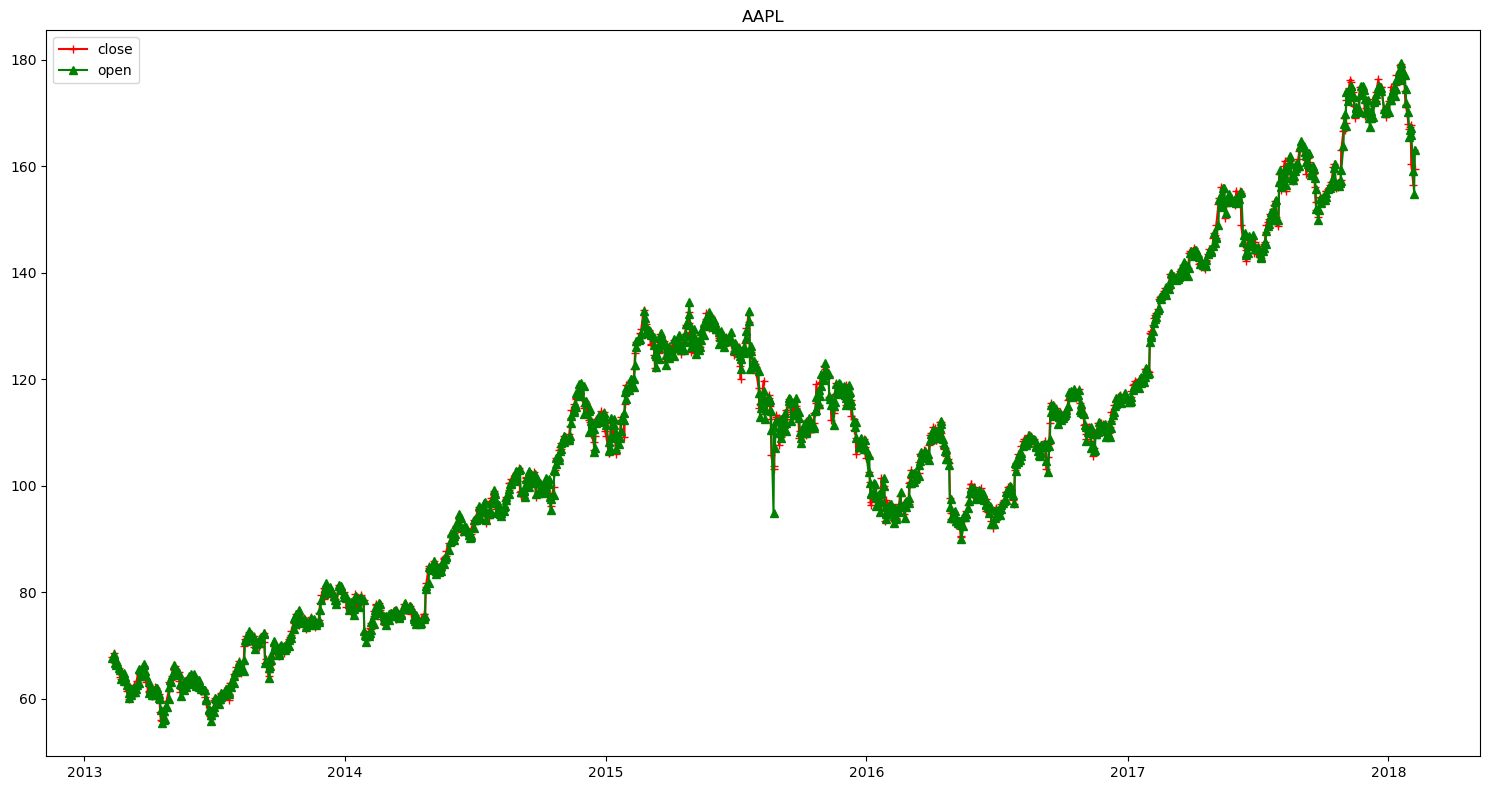

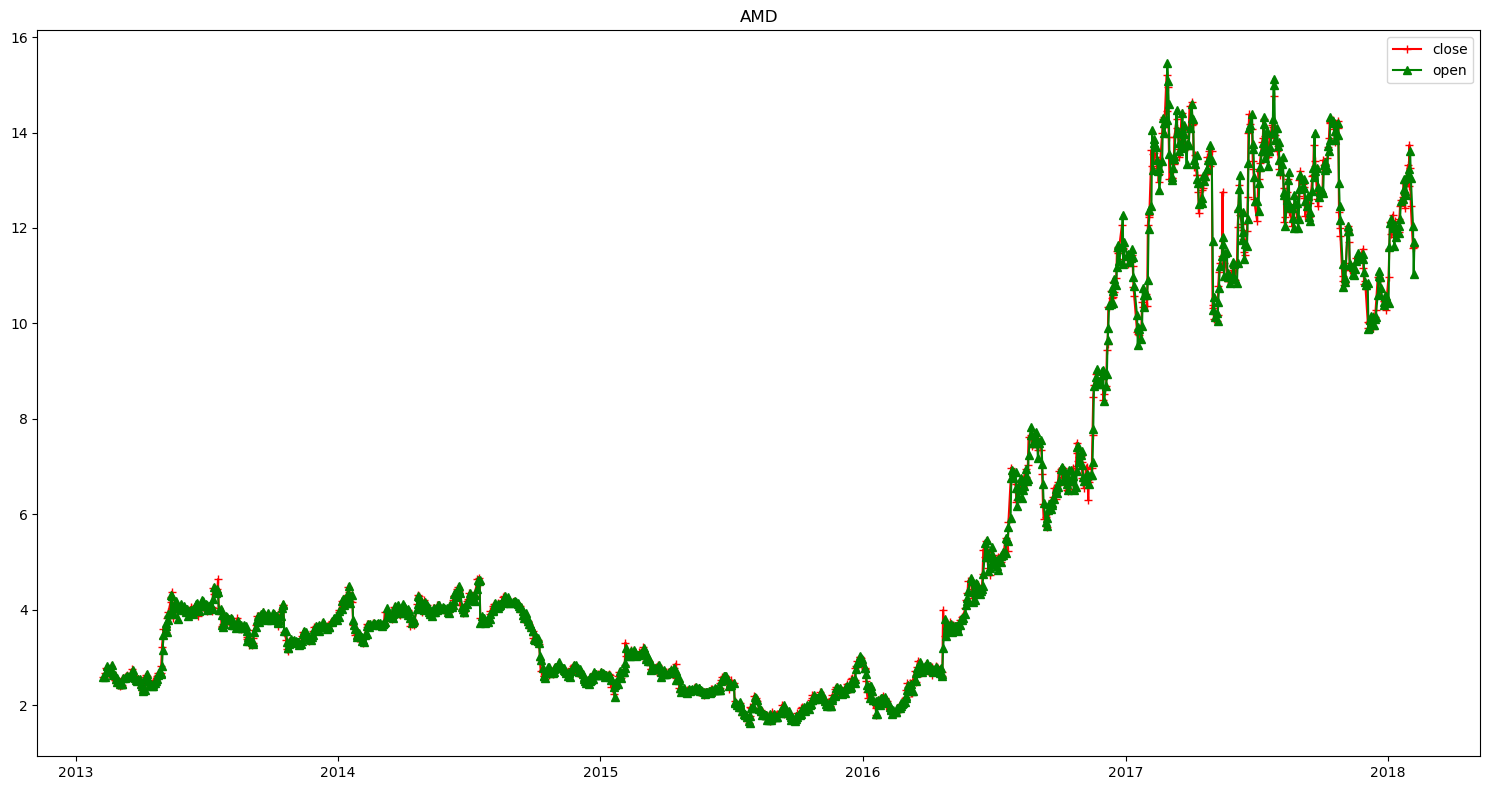

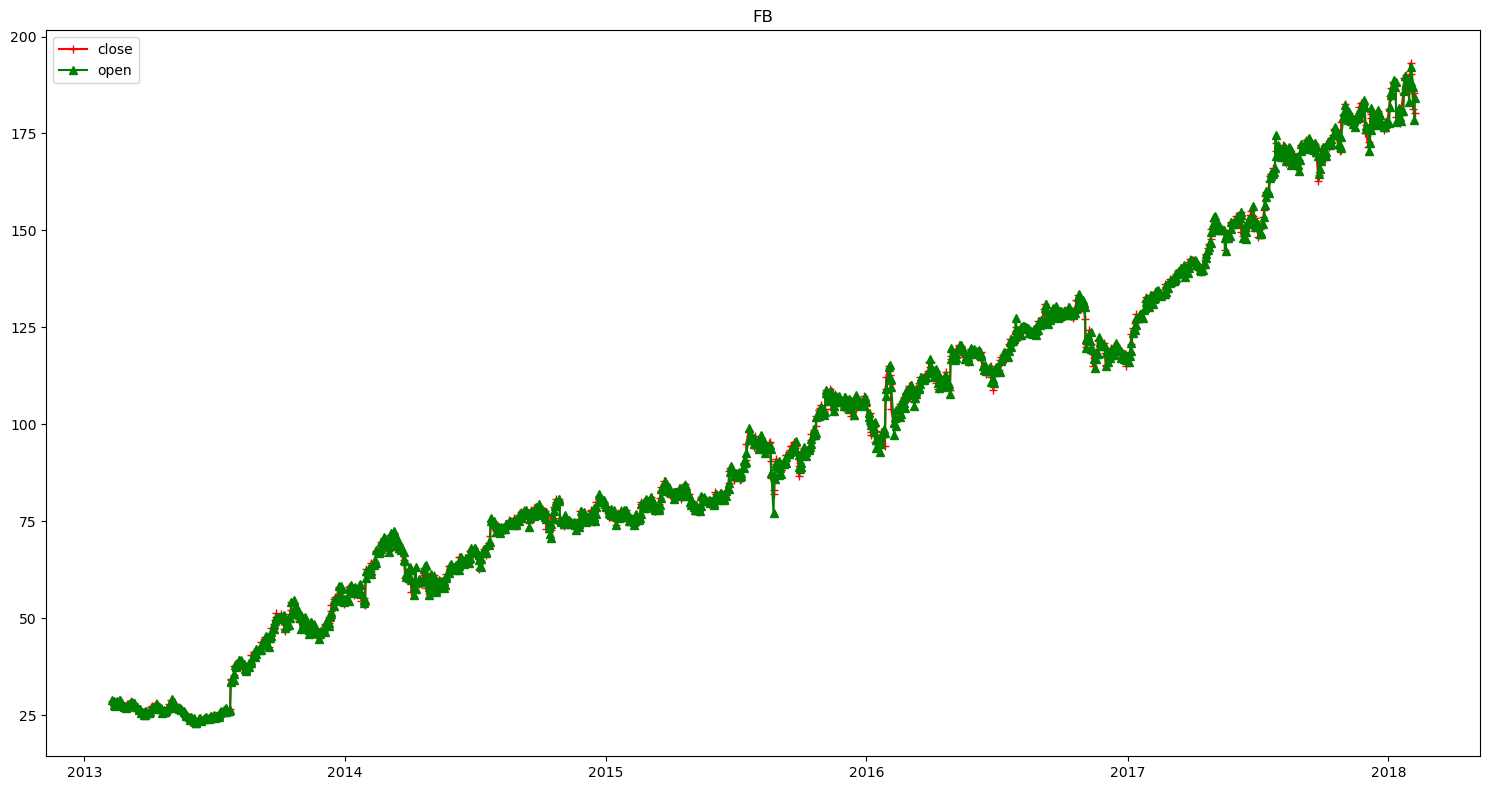

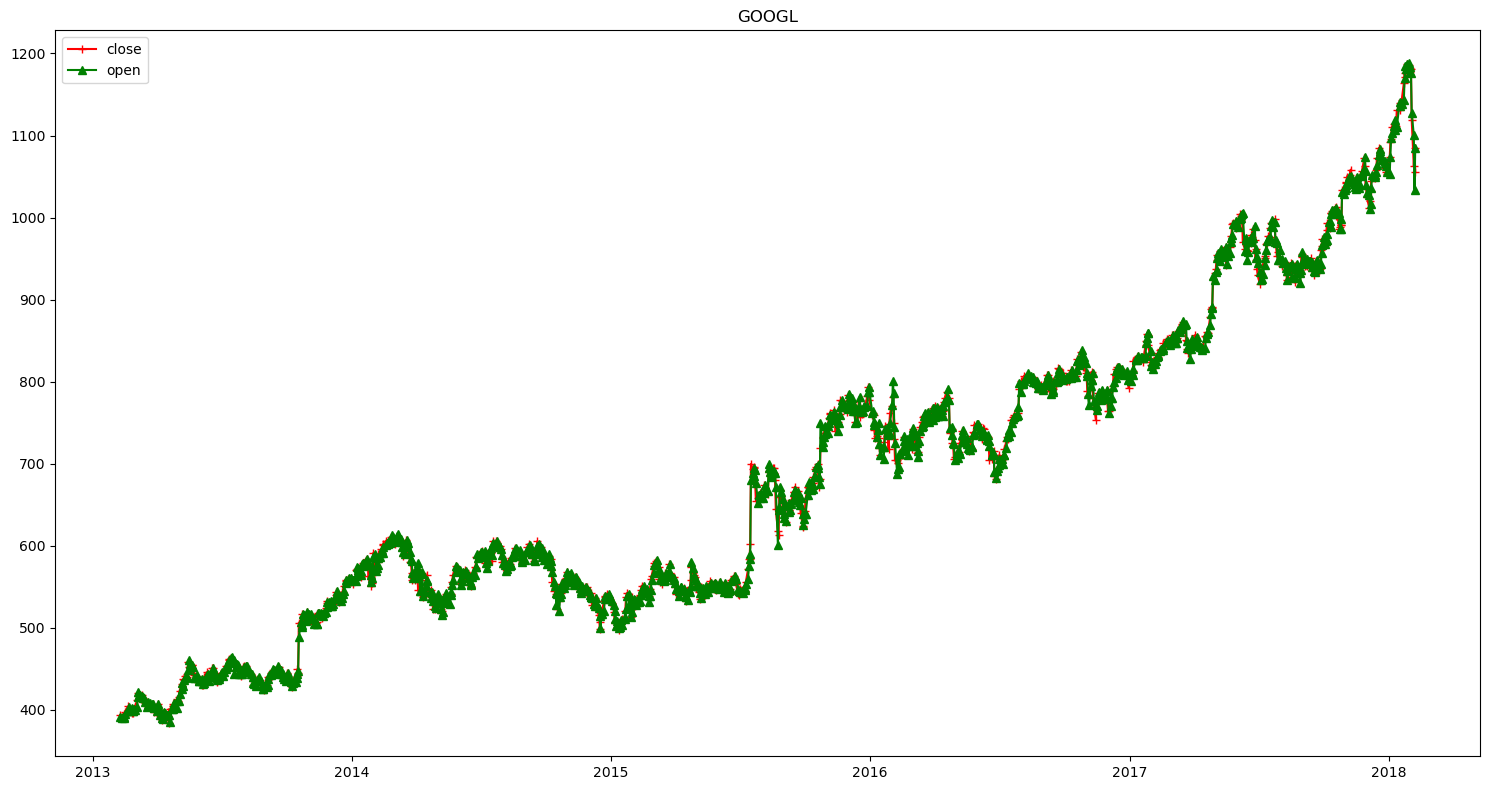

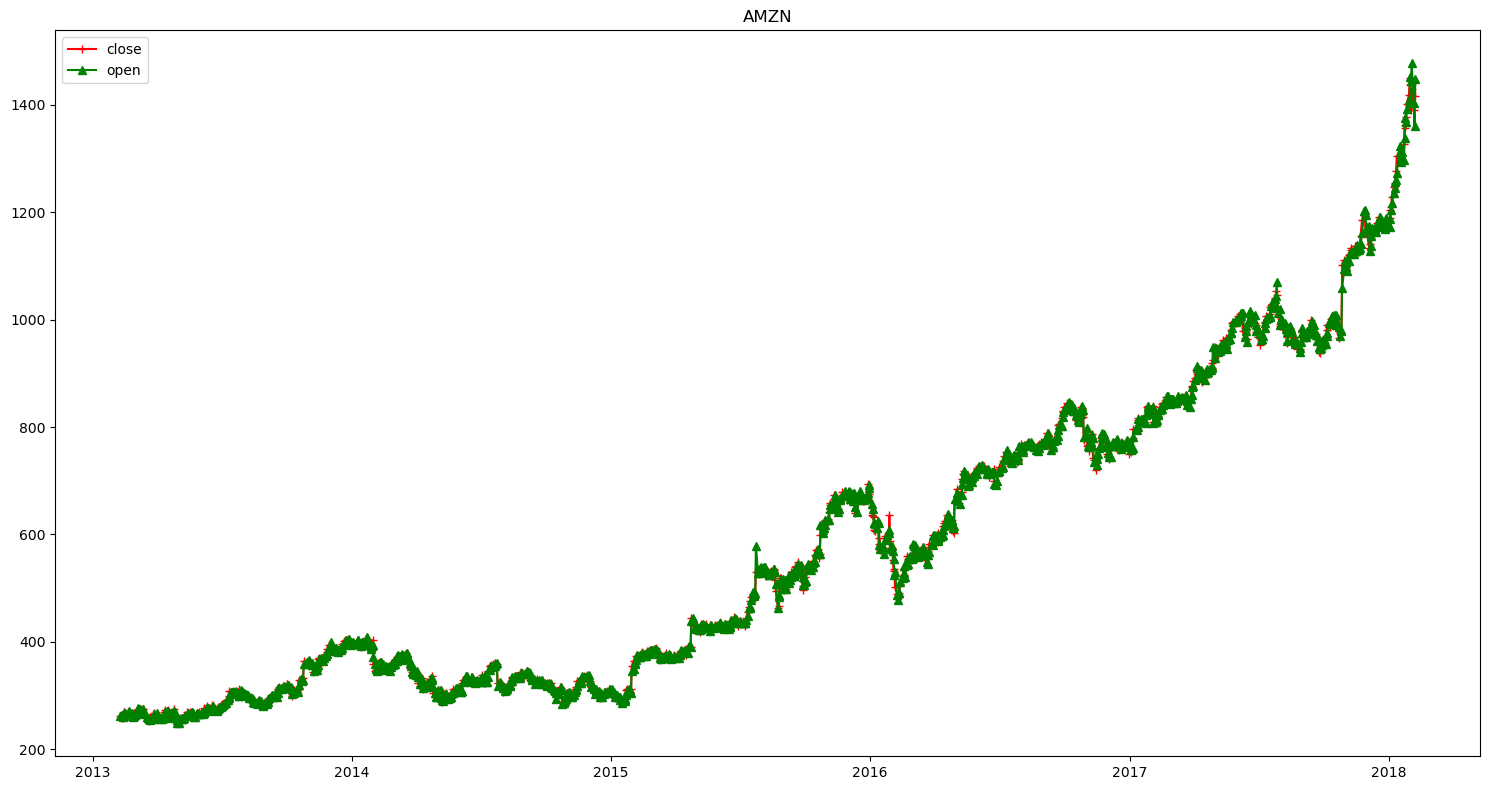

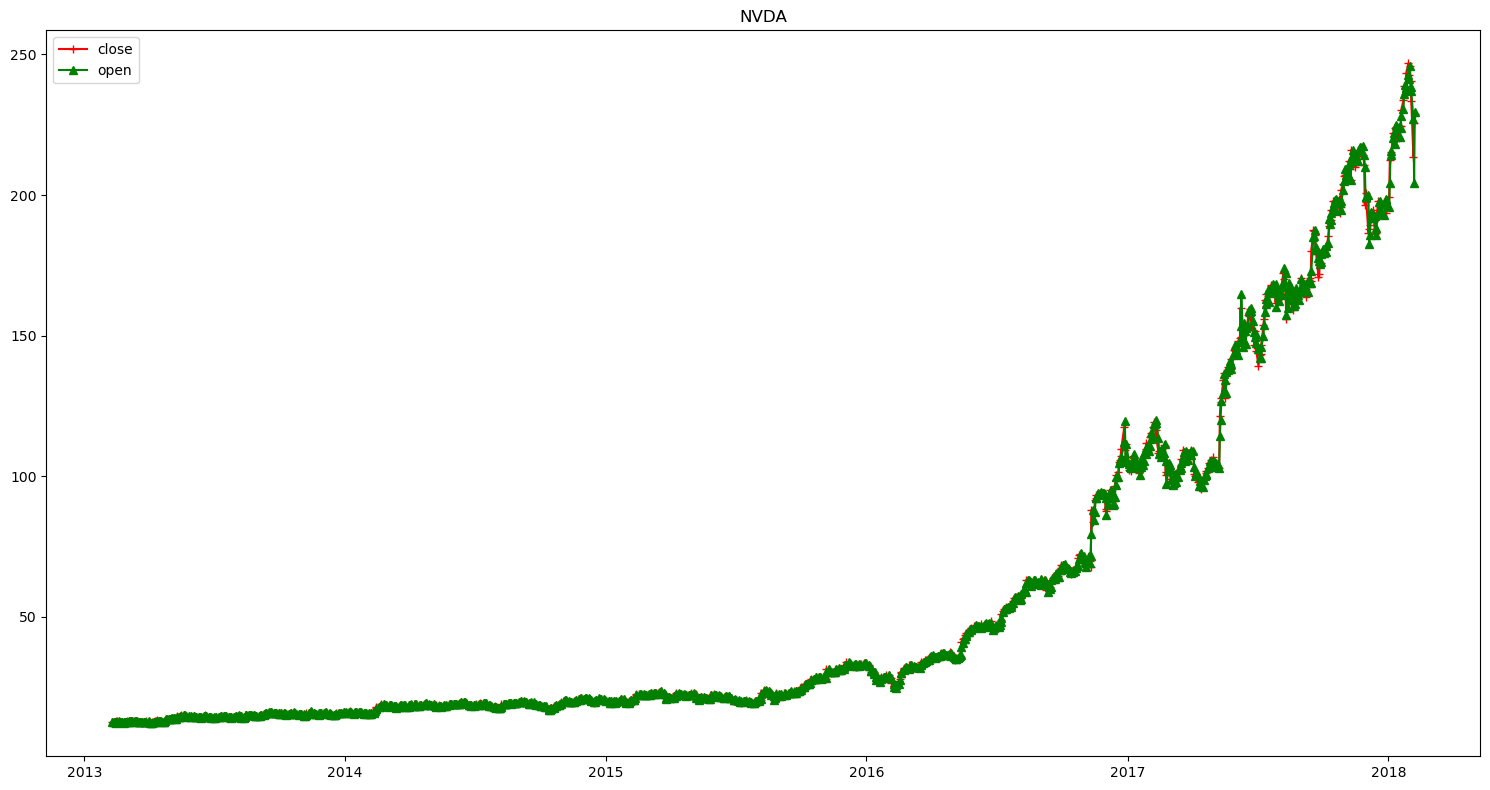

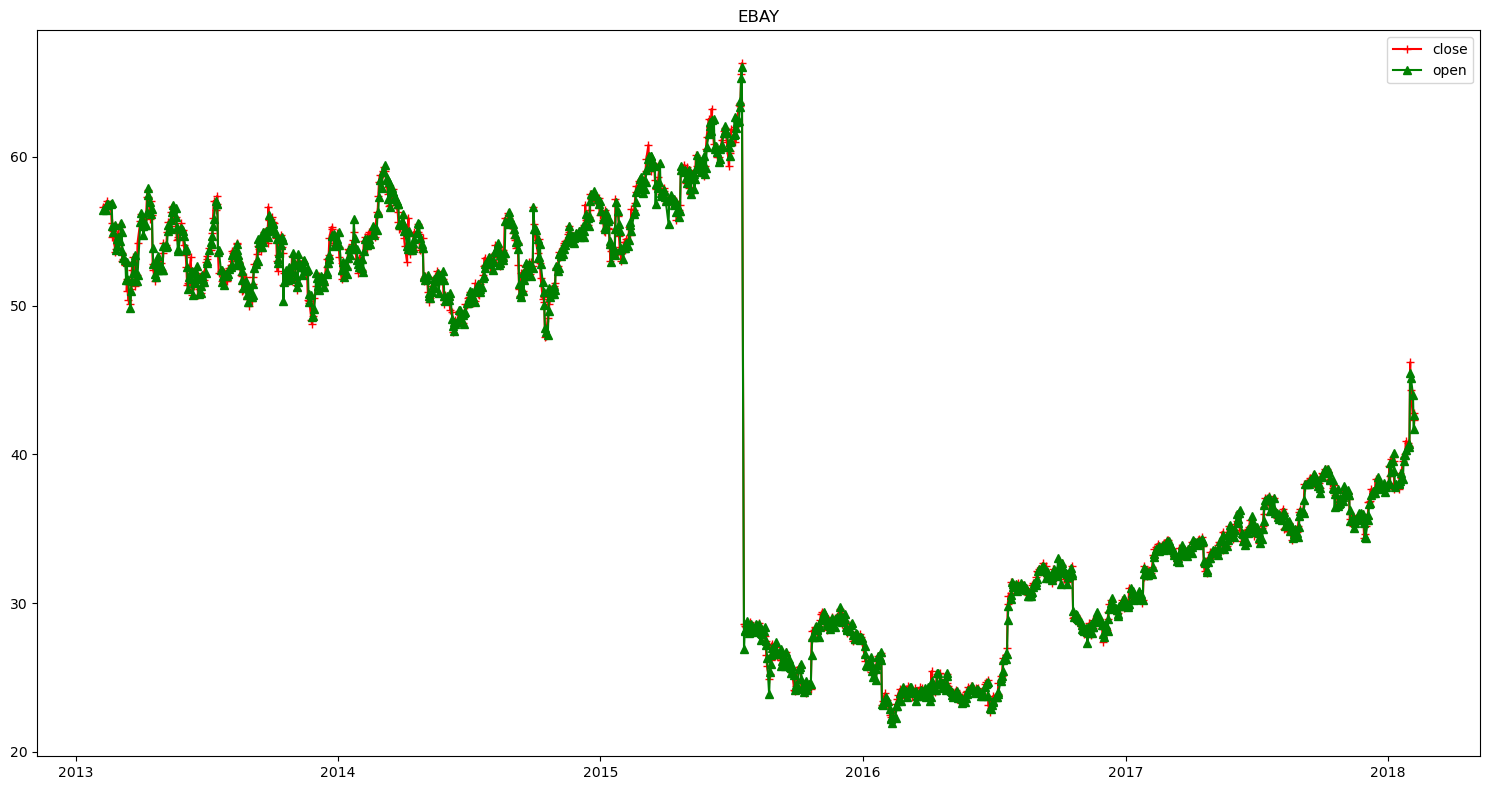

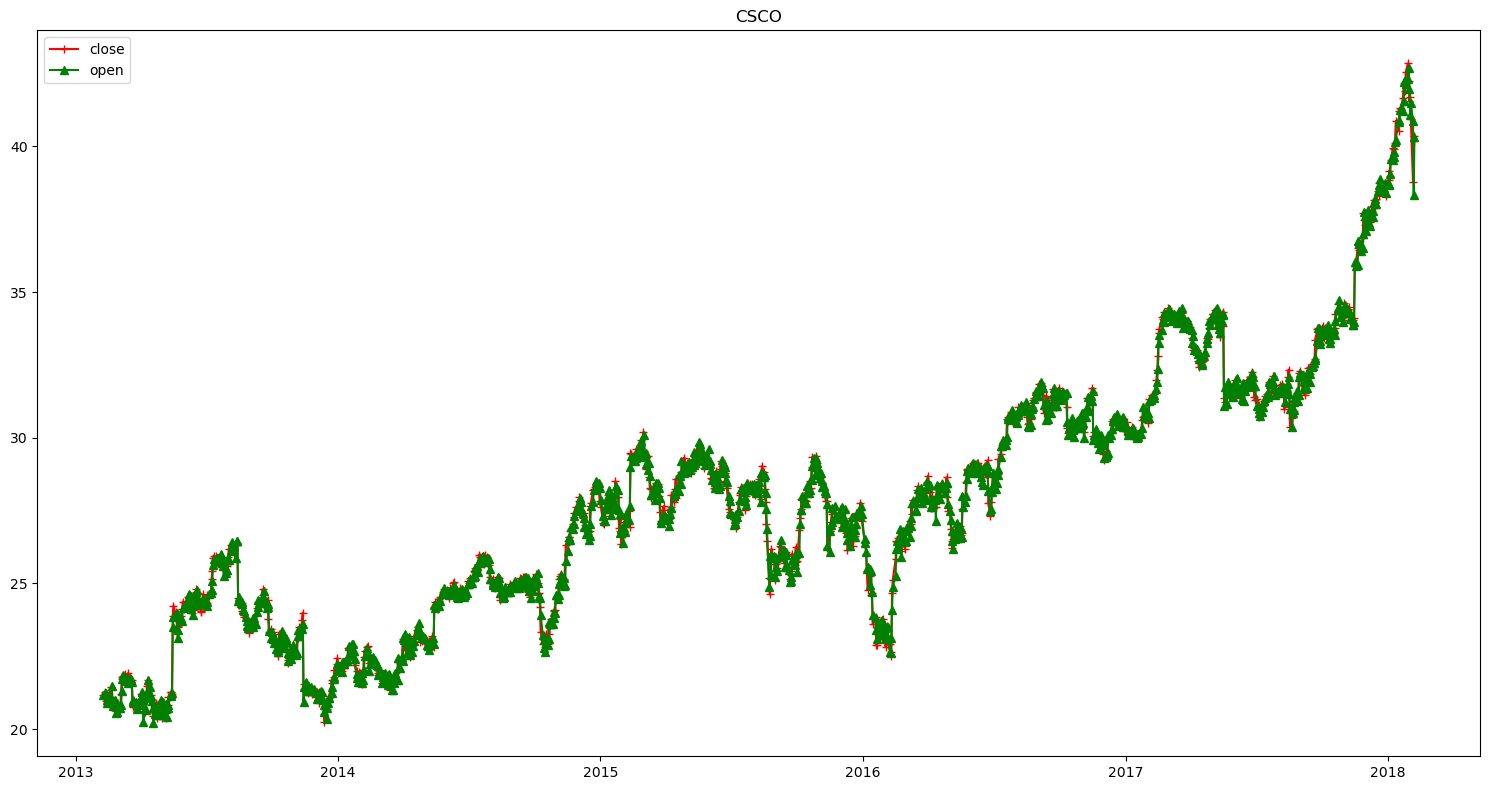

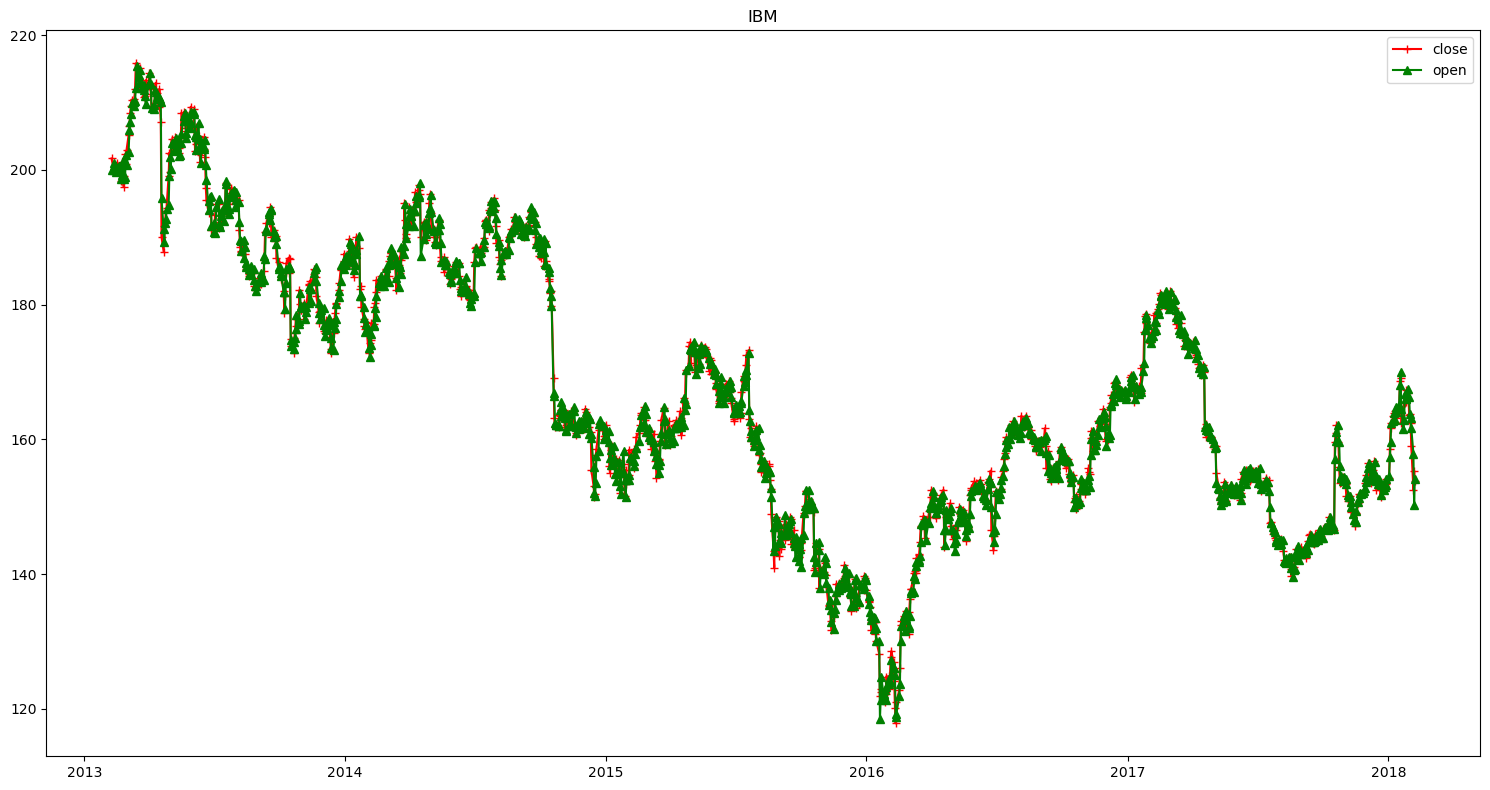

In [ ]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']


for index, company in enumerate(companies):
    comp_data = data[data['Name'] == company]
    # figure() takes ratio of plot as arguments
    plt.figure(figsize=(15, 8))
    plt.plot(comp_data['date'],
              comp_data['close'],
                c='r',
                  label='close',
                   marker='+', )
    plt.plot(comp_data['date'],
              comp_data['open'],
                c='g',
                  label='open',
                   marker='^')
    plt.title(company)
    plt.legend()
    plt.tight_layout()
    plt.show()

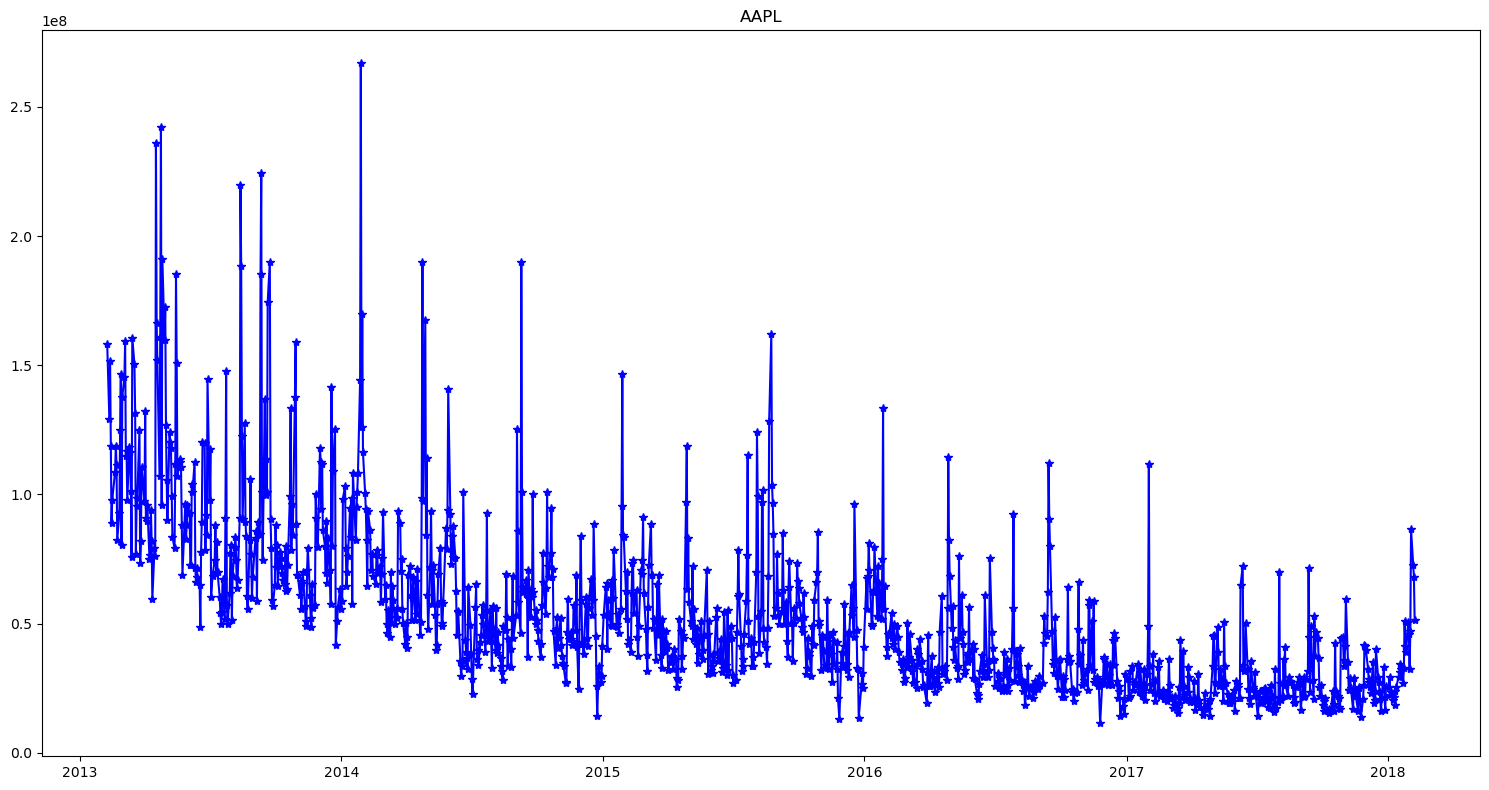

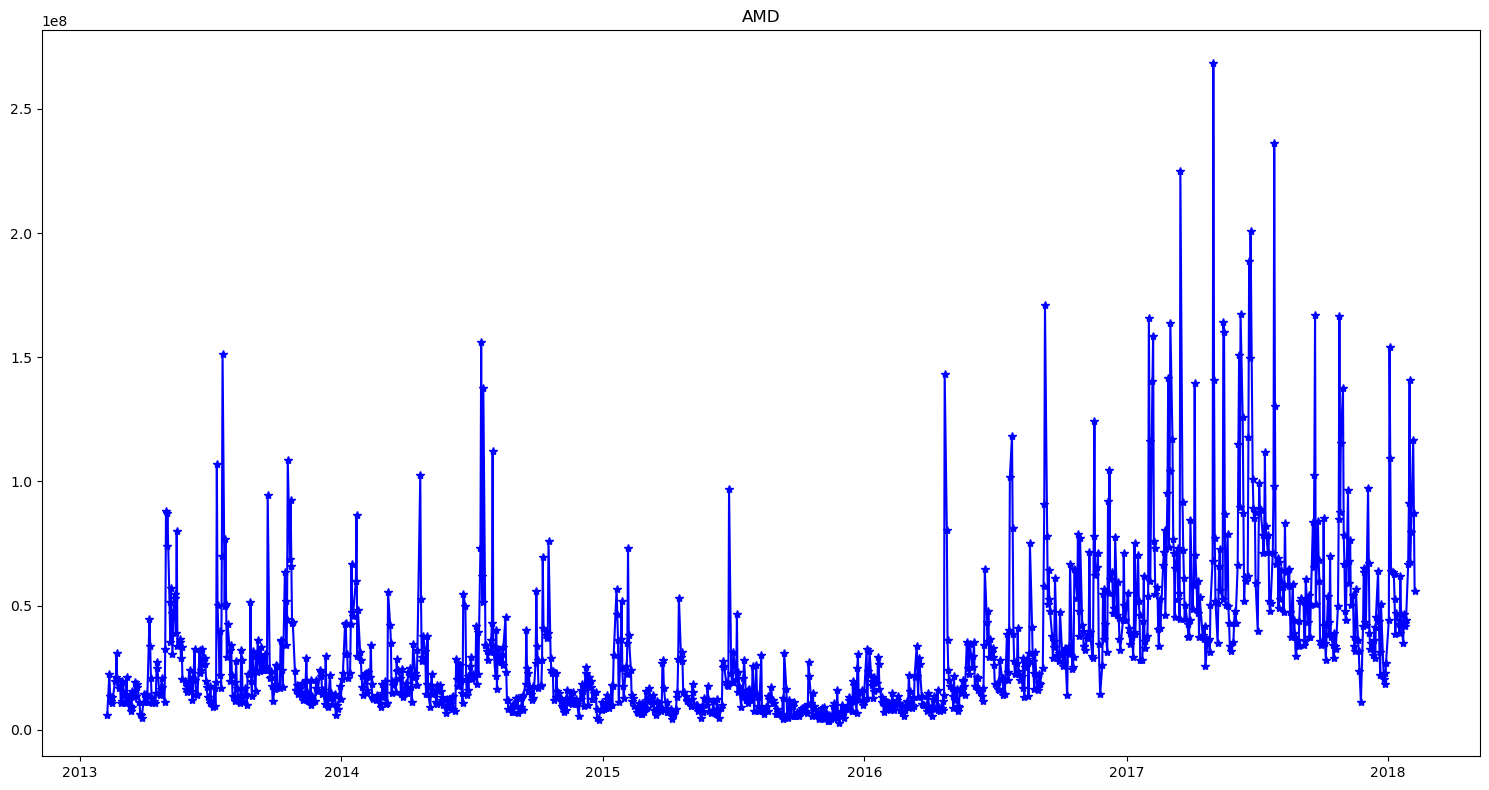

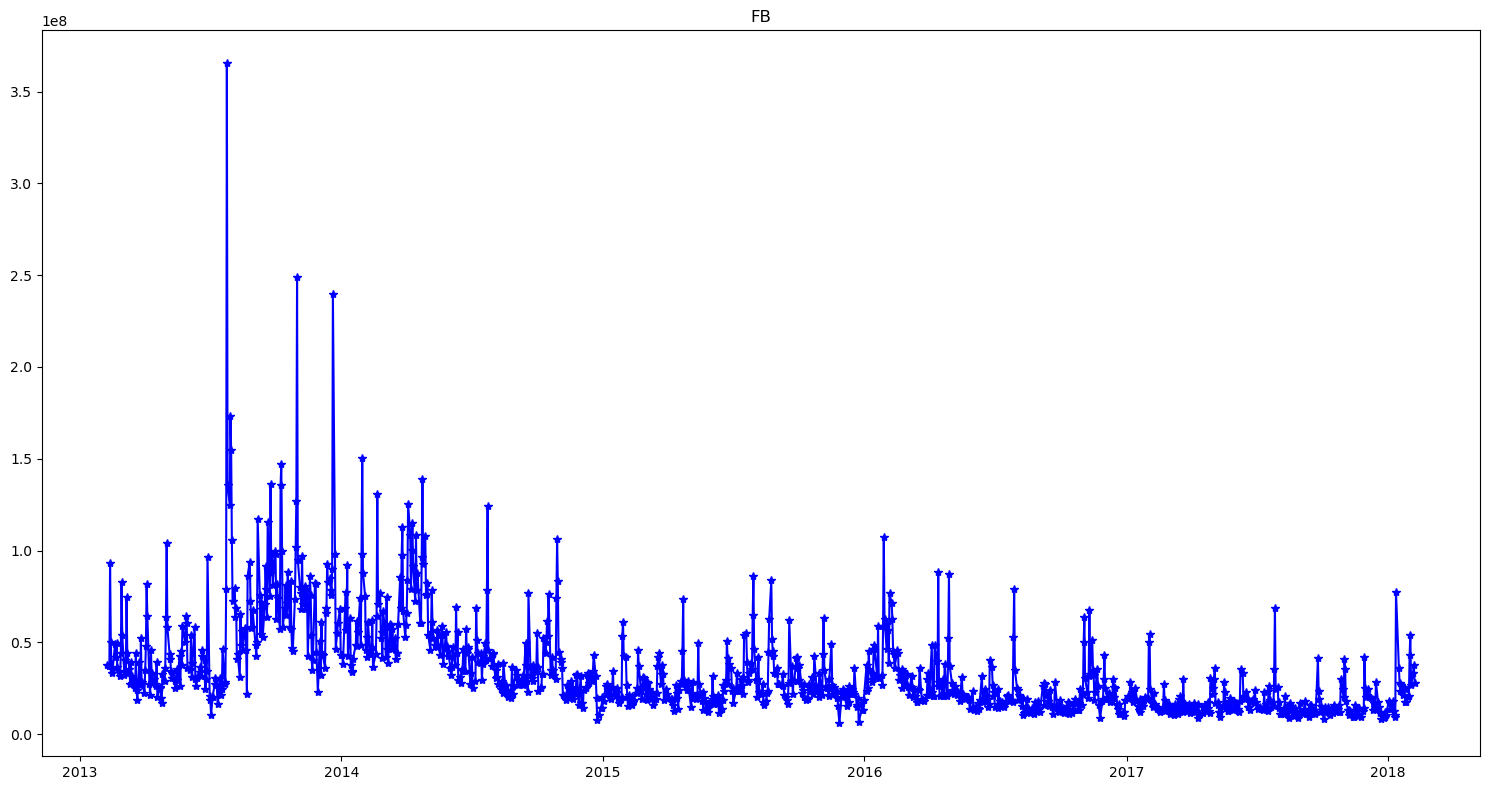

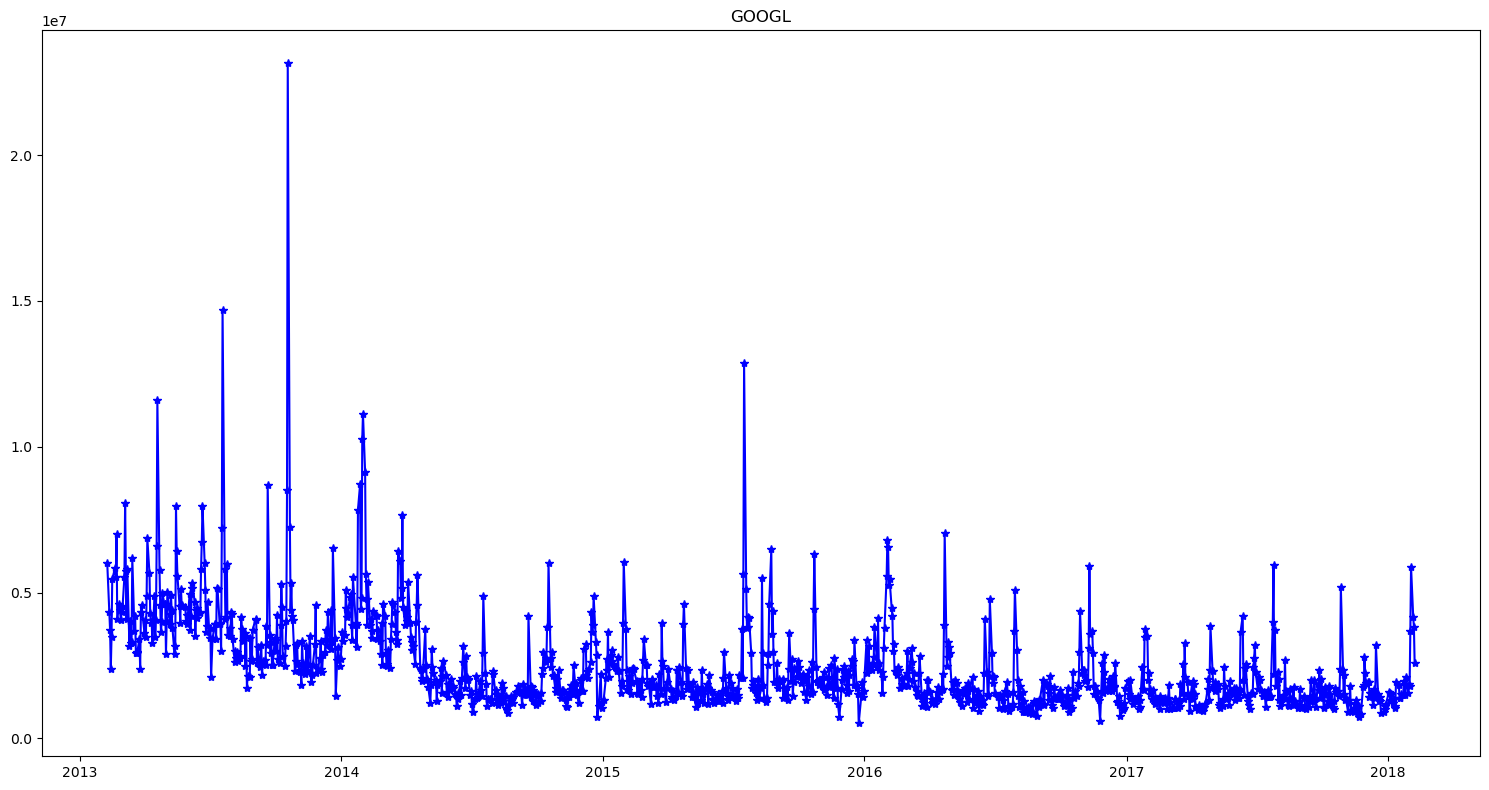

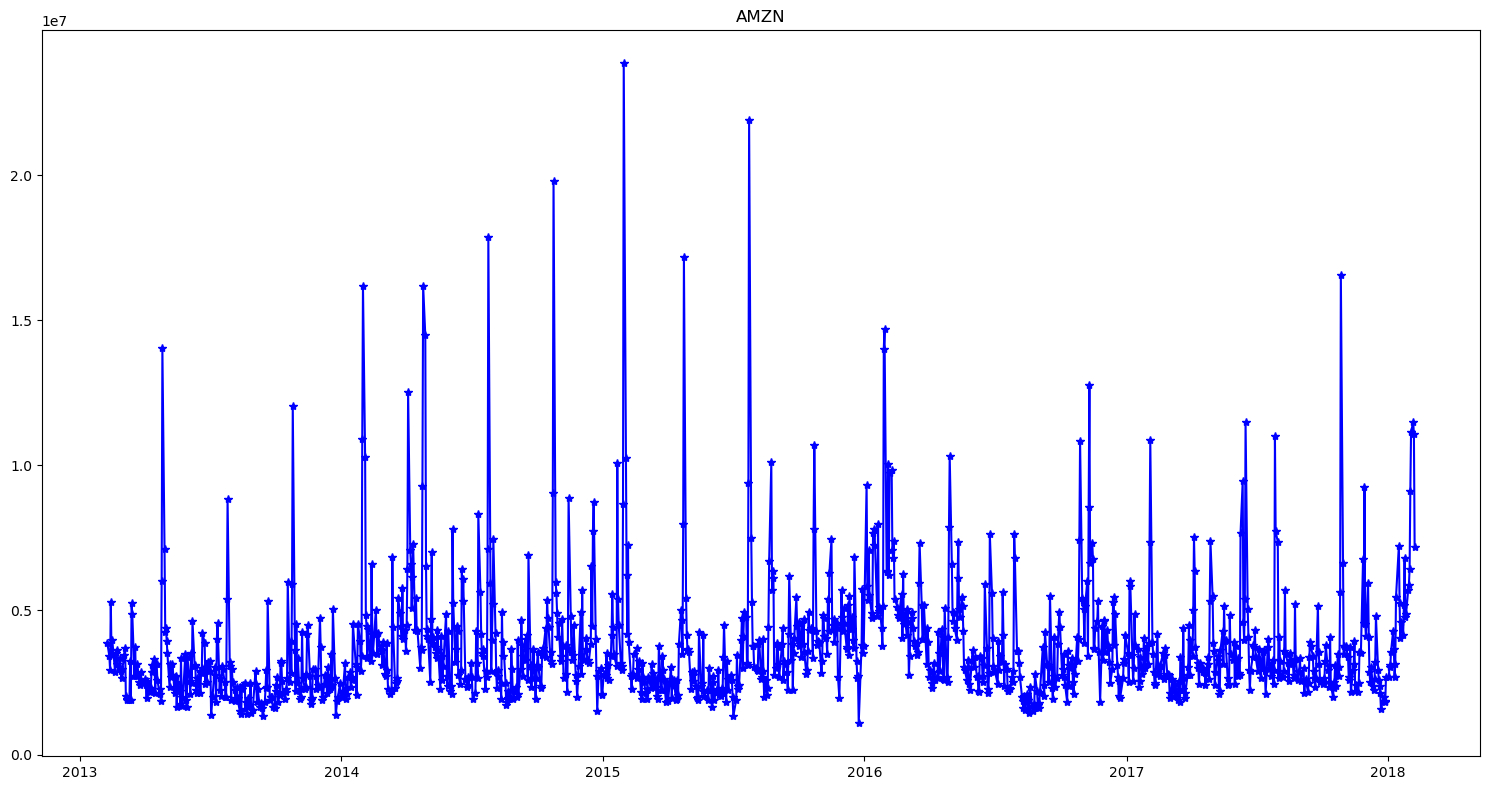

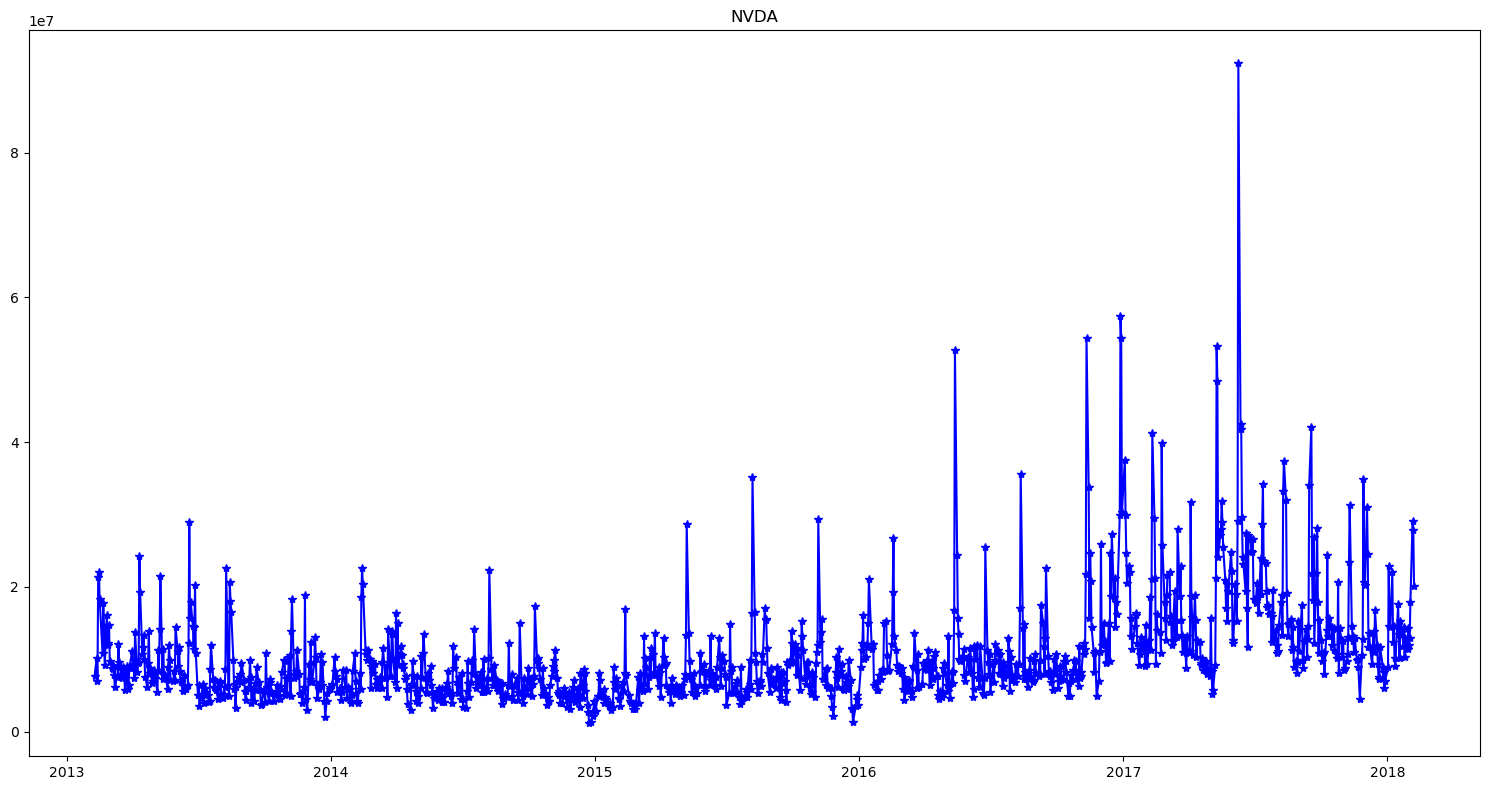

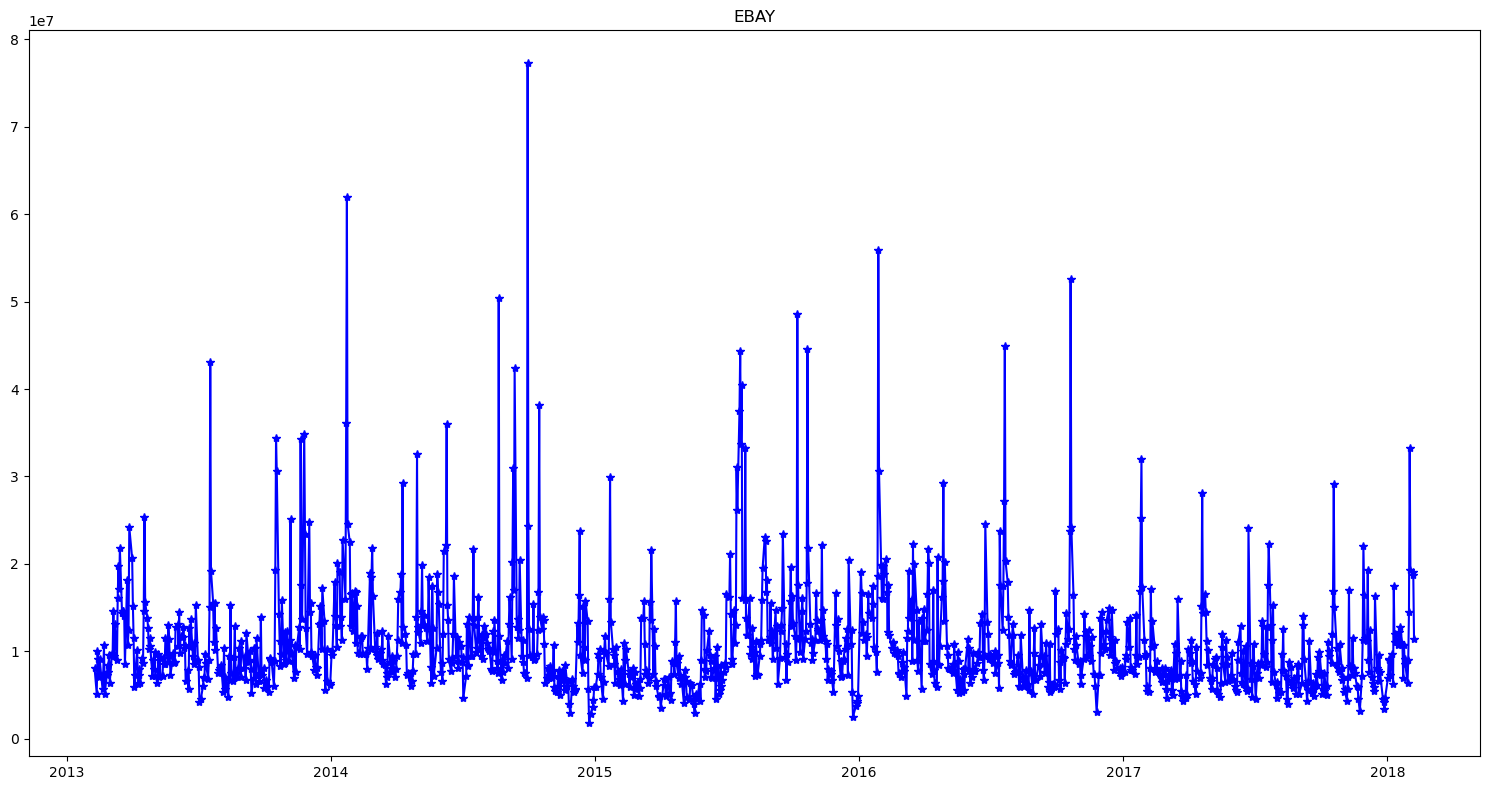

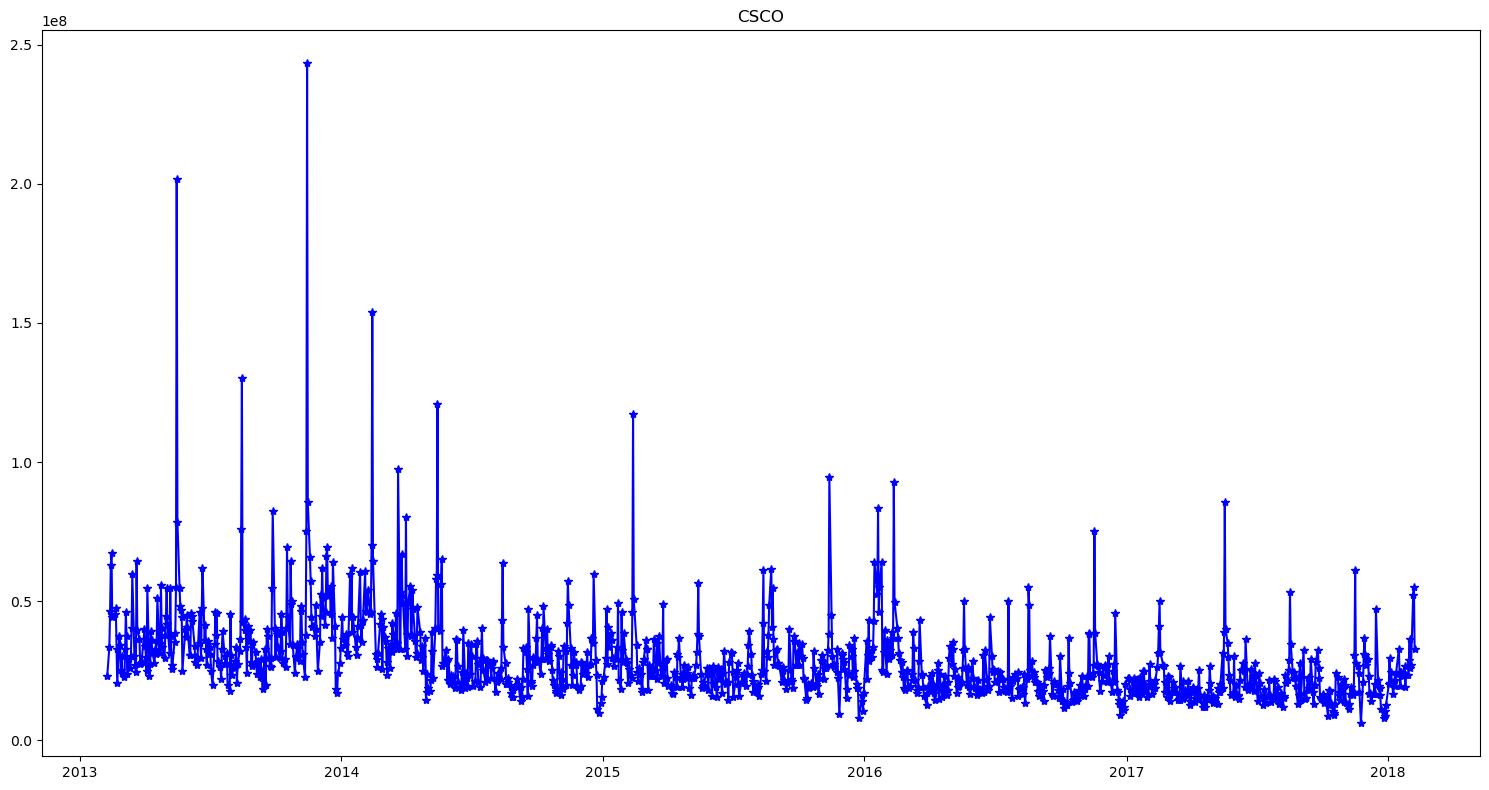

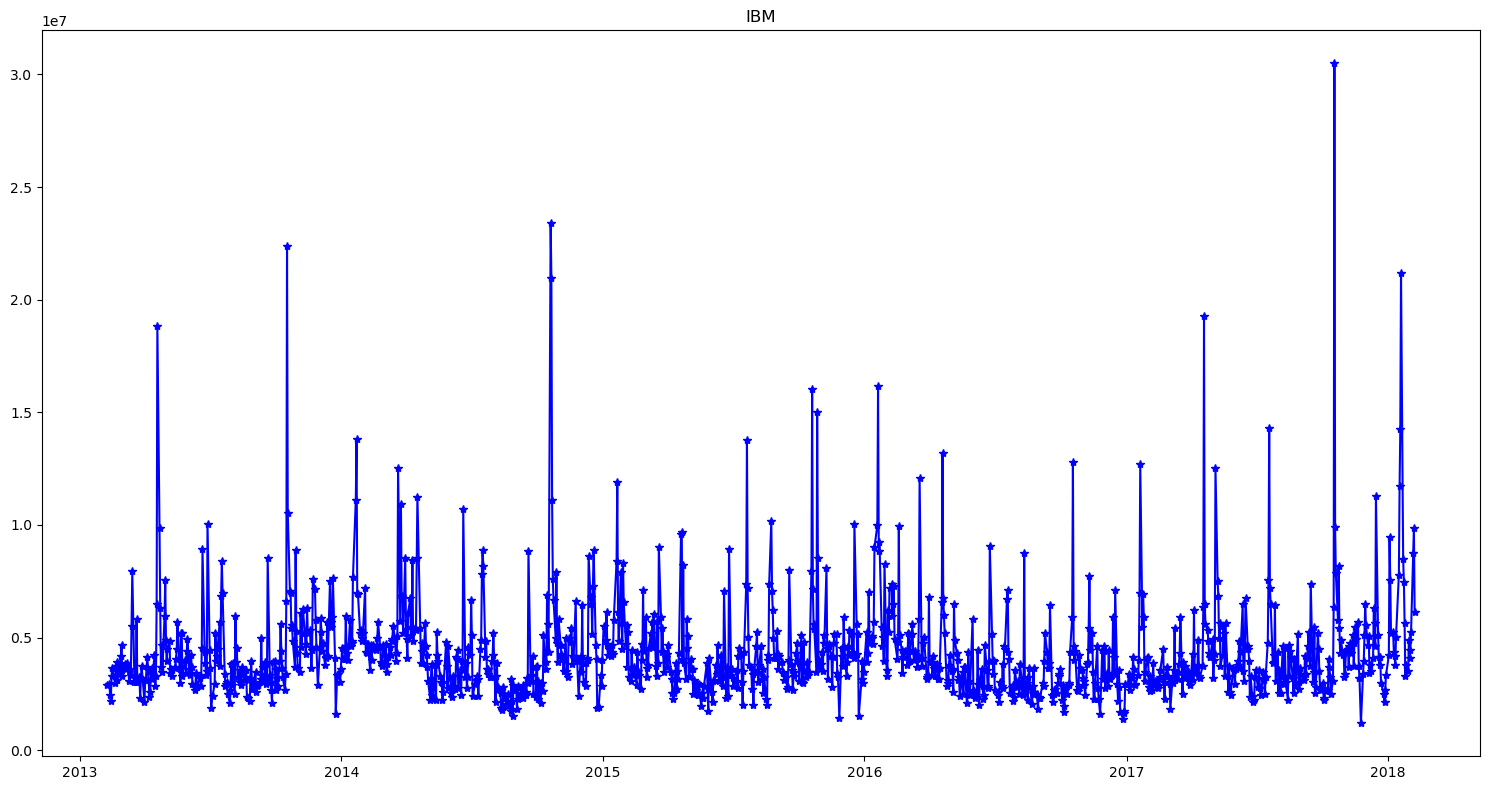

In [37]:
for index, company in enumerate(companies):
    comp_data = data[data['Name'] == company]
    plt.figure(figsize=(15, 8)) 
    plt.plot(comp_data['date'],
              comp_data['volume'],
                c='b',
                   marker='*', )
    plt.title(company)
    plt.tight_layout()
    plt.show()

### Let us concentrate on the Amazon Stocks from 2013 to 2018 for this example.

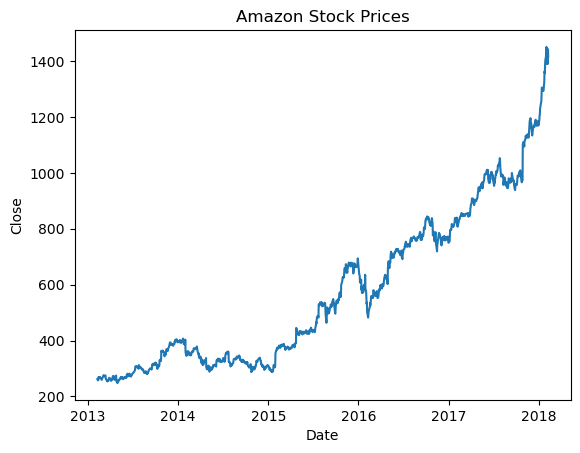

In [21]:
amazon = data[data['Name'] == 'AMZN']
prediction_range = amazon.loc[(amazon['date'] > datetime(2013,1,1))
 & (amazon['date']<datetime(2018,1,1))]
plt.plot(amazon['date'],amazon['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Amazon Stock Prices")
plt.show()

## Feature Engineering and Selection

In [ ]:
# using 95 % of the dataset for training
close_data = amazon.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# create 3D matrix necessary for fitting model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [25]:
# 3D matrix for training
x_train

array([[[0.01140805],
        [0.00746678],
        [0.0087057 ],
        ...,
        [0.00359204],
        [0.00816523],
        [0.00622786]],

       [[0.00746678],
        [0.0087057 ],
        [0.01766085],
        ...,
        [0.00816523],
        [0.00622786],
        [0.00789916]],

       [[0.0087057 ],
        [0.01766085],
        [0.01746961],
        ...,
        [0.00622786],
        [0.00789916],
        [0.00868907]],

       ...,

       [[0.58926879],
        [0.59847338],
        [0.6112035 ],
        ...,
        [0.71262867],
        [0.71129829],
        [0.70343239]],

       [[0.59847338],
        [0.6112035 ],
        [0.61073786],
        ...,
        [0.71129829],
        [0.70343239],
        [0.71788369]],

       [[0.6112035 ],
        [0.61073786],
        [0.60694627],
        ...,
        [0.70343239],
        [0.71788369],
        [0.72541699]]])

## Model Selection and Training

### Build Gated RNN- LSTM network using TensorFlow

#### Using TensorFlow, we can easily create LSTM-gated RNN cells. LSTM is used in Recurrent Neural Networks for sequence models and time series data. LSTM is used to avoid the vanishing gradient issue which is widely occurred in training RNN. To stack multiple LSTM in TensorFlow it is mandatory to use return_sequences = True. Since our data is time series varying we apply no activation to the output layer and it remains as 1 node. 

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

#### While compiling a model we provide these three essential parameters:
- #### optimizer – This is the method that helps to optimize the cost function by using gradient descent.

- #### loss – The loss function by which we monitor whether the model is improving with training or not.

- #### metrics – This helps to evaluate the model by predicting the training and the validation data.

In [31]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0318
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0058
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0050
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0033
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0035
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0030
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0027
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031


## Model Testing and Evaluation

In [33]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MSE 6344.21180219895
RMSE 79.65056058935775


#### The last 5% of the dataset is used for testing. The prediction can be compared against it to test the accuracy of the model.

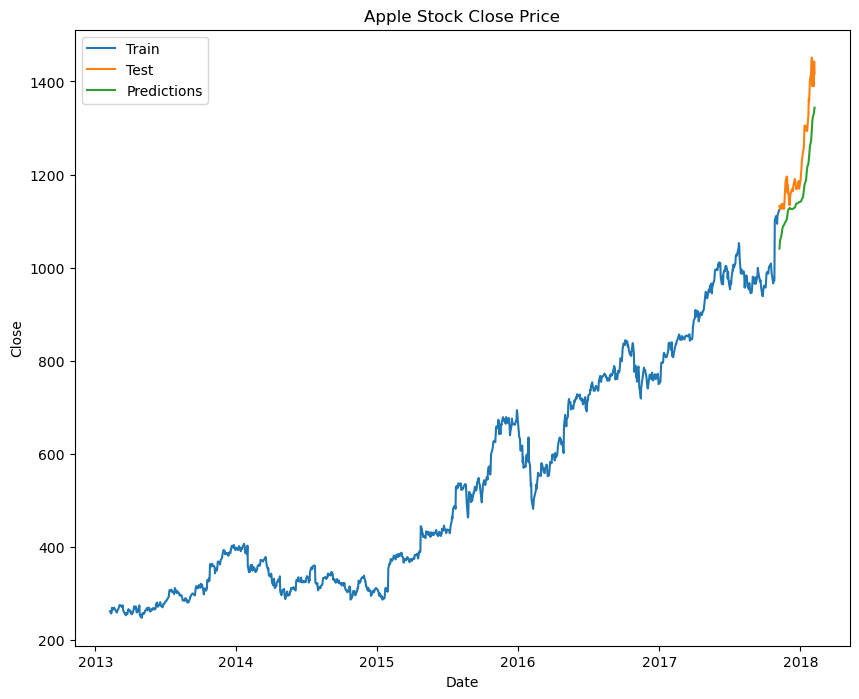

In [ ]:
train = amazon[:training]
test = amazon[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()